## **Soal Seleksi DSA**
1. List merek mobil yang tersedia dan jumlah mobil tiap merek
2. Kota dengan mobil bekas paling banyak
3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?
4. Jumlah mobil dengan total jarak pemakaian di bawah 100.000 kilometer
5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? **Sertakan argumen yang mendukung jawaban.**
6. Apakah terdapat outlier pada kolom **Kilometers_Driven**? Sertakan argumen yang mendukung jawaban.
7. Apakah **tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian**? Sertakan argumen yang mendukung jawaban.
8. Jumlah mobil yang  kepemilikan ketiga atau lebih
9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?
10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban


# Data Pre-Processing

In [627]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #SeaBorn Default View

# Load Data dari Drive

dataset = pd.read_csv('/content/drive/My Drive/used_car_data.csv')
df = dataset

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [629]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [630]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


# Jawaban Seleksi

## **1. List Merk Mobil dan Jumlahnya**

In [631]:
# Pisahkan Brand dan Seri Mobil
for i in range(df.shape[0]):
  df.at[i, 'Name'] = df['Name'][i].split()[0] 
    
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [632]:
# List Merek Mobil dan Jumlahnya

df.Name.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Bentley             1
Ambassador          1
Smart               1
Isuzu               1
Name: Name, dtype: int64

In [633]:
df.Name.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

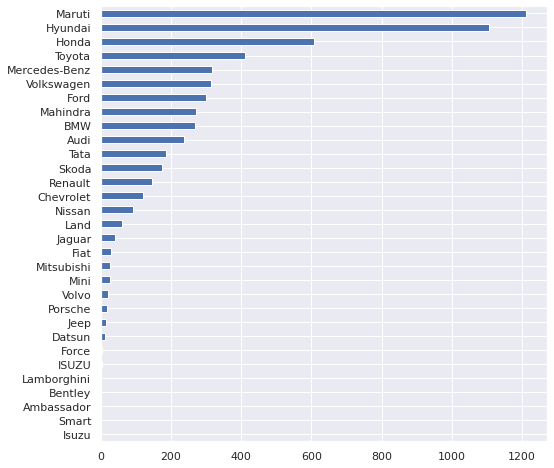

In [634]:
# Plot Horizontal Bar Diagram untuk Brand-Count
plt.figure(figsize=(8, 8))
df.Name.value_counts(ascending=True).plot(kind='barh')

## **2. Kota dengan Mobil Bekas Terbanyak**

In [635]:
# 2. Kota dengan Mobil Bekas terbanyak

kota = df.loc[df.Owner_Type != 'First', 'Location']
print(kota.value_counts())

Pune          201
Chennai       159
Mumbai        137
Bangalore     127
Jaipur        113
Delhi          97
Hyderabad      84
Coimbatore     65
Ahmedabad      38
Kochi          37
Kolkata        32
Name: Location, dtype: int64


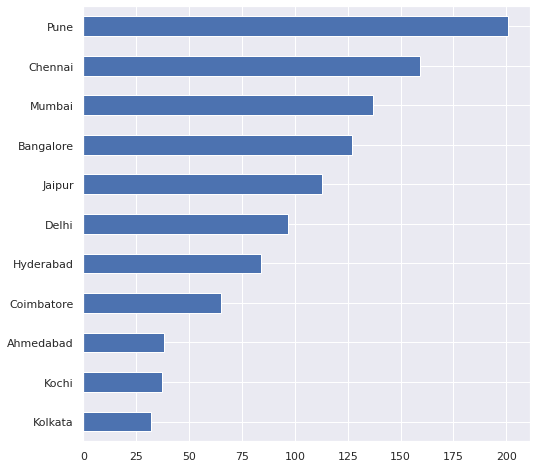

In [636]:
# Plot Horizontal Bar Diagram Kota dg Mobil Bekas Terbanyak

plt.figure(figsize=(8, 8))
kota.value_counts(ascending=True).plot(kind='barh')

## **3. Distribusi Tahun Mobil Bekas**

In [637]:
# 3. Distribusi Tahun Mobil Bekas

tahun = df.loc[df.Owner_Type != 'First', 'Year']
tahun.value_counts()

2011    130
2013    121
2012    121
2010    106
2014    104
2008     93
2015     83
2009     82
2007     60
2006     44
2016     34
2005     27
2017     24
2004     20
2003     12
2002     10
2018      7
2001      6
1998      3
2000      2
1999      1
Name: Year, dtype: int64

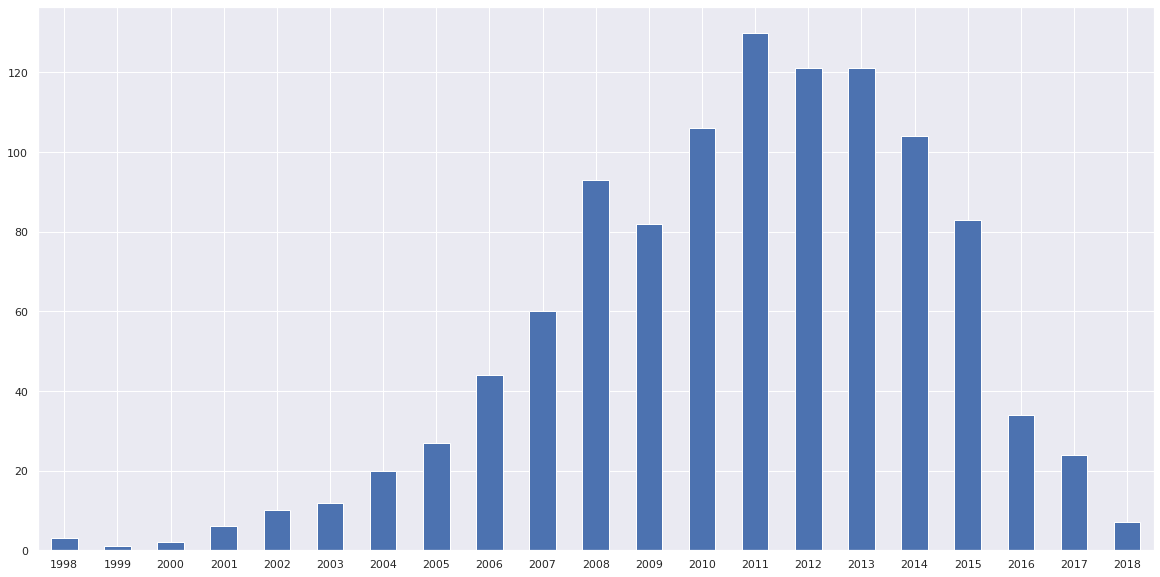

In [638]:
# Distribusi Tahun Mobil Bekas
tahun = df.loc[df.Owner_Type != 'First', 'Year']
plt.figure(figsize=(20, 10))
tahun.value_counts(sort=False).plot.bar(rot=0)

## **4. Jumlah Mobil dengan KM Driven <100.000**

In [639]:
# 4. Hitung Mobil dengan jarak pemakaian <100.000 KM
KM_Driven = df.Kilometers_Driven
jarak = df.loc[KM_Driven <100000, 'Kilometers_Driven']
print("Jumlah Mobil dengan Jarak Pemakaian kurang dari 100.000 km:"
      ,jarak.count(), "buah mobil")

Jumlah Mobil dengan Jarak Pemakaian kurang dari 100.000 km: 5470 buah mobil


## **8. Jumlah Mobil Kepemilikan Ke-3 atau lebih**

In [640]:
# Hitung dimensi data mobil ke-3 lebih

Owner = df.Owner_Type
Third = df.loc[Owner == 'Third', 'Year'].count().astype(int)
Fourth = df.loc[Owner == 'Fourth & Above', 'Year'].count().astype(int)
Sum = Third+Fourth
print("Jumlah Mobil Kepemilikan ke-3:", Third)
print("Jumlah Mobil Kepemilikan ke-4 atau lebih:", Fourth)
print("Total:",Sum, "Buah Mobil Kepemilikan Ke-3 atau lebih")

Jumlah Mobil Kepemilikan ke-3: 113
Jumlah Mobil Kepemilikan ke-4 atau lebih: 9
Total: 122 Buah Mobil Kepemilikan Ke-3 atau lebih


In [641]:
df.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

## **6. Outlier Treatment: KM Driven**

In [642]:
b4out = df.shape
print(b4out)

(6019, 12)


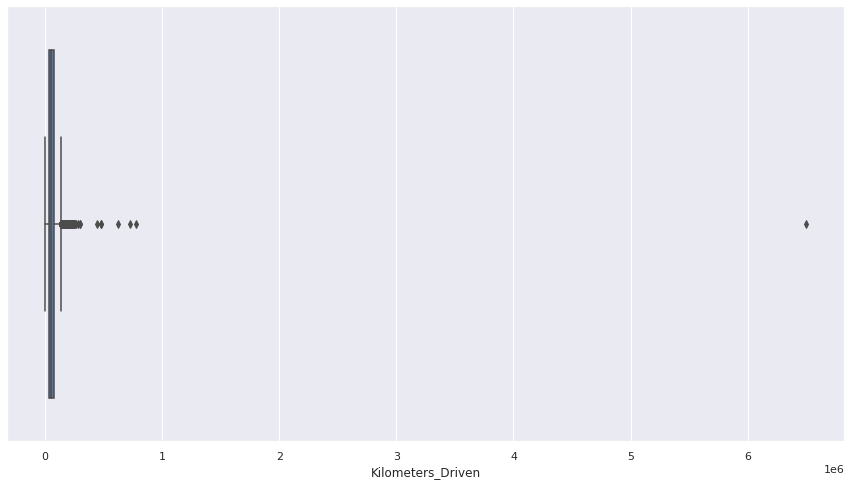

In [643]:
# Boxplot Dataset 
plt.figure(figsize=(15, 8))
sns.boxplot(data=df,x=df["Kilometers_Driven"])

In [644]:
# Proses Reduksi

Q1_0 = df["Kilometers_Driven"].quantile(0.25)
Q3_0 = df["Kilometers_Driven"].quantile(0.75)
IQR_0 = Q3_0-Q1_0
print("Q1  : ", Q1_0)
print("Q3  : ", Q3_0)
print("IQR : ", IQR_0)
Lower_Whisker = Q1_0 - 1.5*IQR_0
Upper_Whisker = Q3_0 + 1.5*IQR_0
print(Lower_Whisker, Upper_Whisker)

Q1  :  34000.0
Q3  :  73000.0
IQR :  39000.0
-24500.0 131500.0


In [645]:
# Proses Reduksi

df = df[df["Kilometers_Driven"]< Upper_Whisker]
afterout = df.shape
selisih = b4out[0]-afterout[0]
print("Sebelum Reduksi  = ", b4out)
print("Setelah Reduksi  = ", afterout)
print("Reduksi Sejumlah = ", selisih, "Baris")

Sebelum Reduksi  =  (6019, 12)
Setelah Reduksi  =  (5817, 12)
Reduksi Sejumlah =  202 Baris


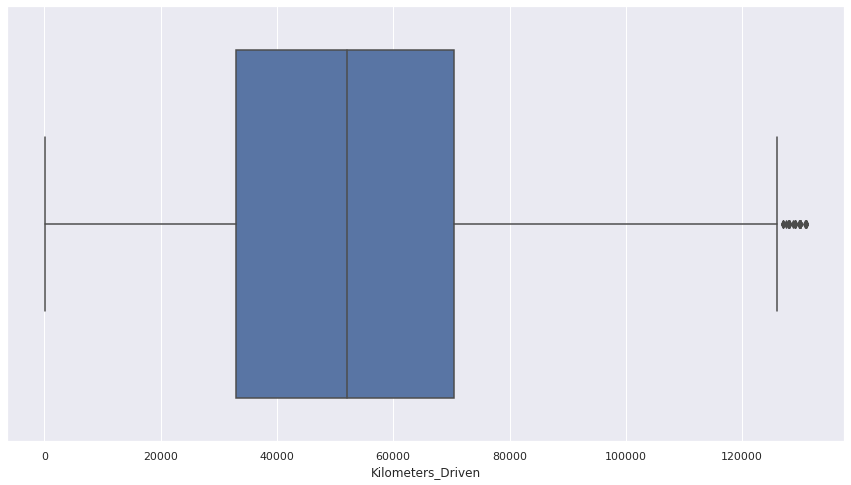

In [646]:
# Plot Setelah Reduksi
plt.figure(figsize=(15, 8))
sns.boxplot(data=df,x=df["Kilometers_Driven"])

## **5. Batas Pemakaian Rendah/Tinggi**

In [647]:
# Analisis Data Kilometers_Driven

df.Kilometers_Driven.describe()

count      5817.000000
mean      53488.810555
std       27009.395430
min         171.000000
25%       33000.000000
50%       52000.000000
75%       70500.000000
max      131000.000000
Name: Kilometers_Driven, dtype: float64

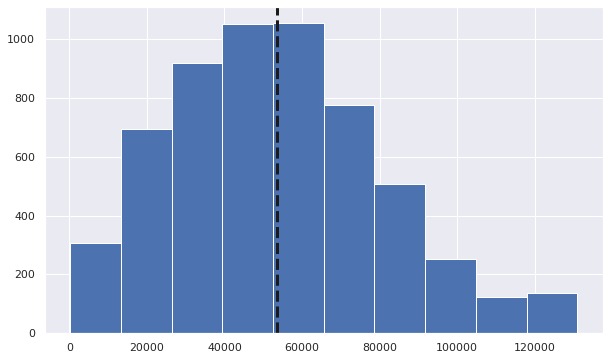

In [648]:
# Histogram Kilometers_Driven

plt.figure(figsize=(10, 6))
plt.hist(df.Kilometers_Driven)
plt.axvline(df.Kilometers_Driven.mean(), color='k',
            linestyle='dashed', linewidth=3)

## **7. Korelasi Tahun Pembuatan dan Jarak Pemakaian Mobil**

<Figure size 1440x720 with 0 Axes>

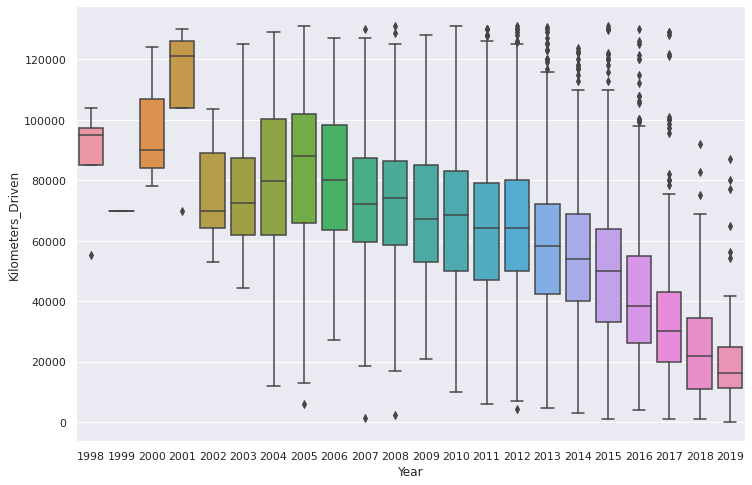

In [649]:
# Plot Korelasi Year dan KM Driven

plt.figure(figsize=(20, 10))
year_km = pd.concat([df['Year'], df['Kilometers_Driven']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='Year', y='Kilometers_Driven', data=year_km)

## **9. Bahan Bakar Paling Irit**

In [650]:
# Pisahkan Angka Mileage dari Satuan Km/Kg

aa = df.Mileage.str.extract('([^a-zA-Z]+)([a-zA-Z]+)', expand=True) # Pisahkan Angka dan String
aa.columns = ['Mil', 'Km/kg'] # Set nama kolom
df.Mileage = aa.Mil # Assign ke Mileage
df['Mileage'] = df['Mileage'].astype(float) # Ubah dtype Mileage jadi Float
# df.info()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1440x720 with 0 Axes>

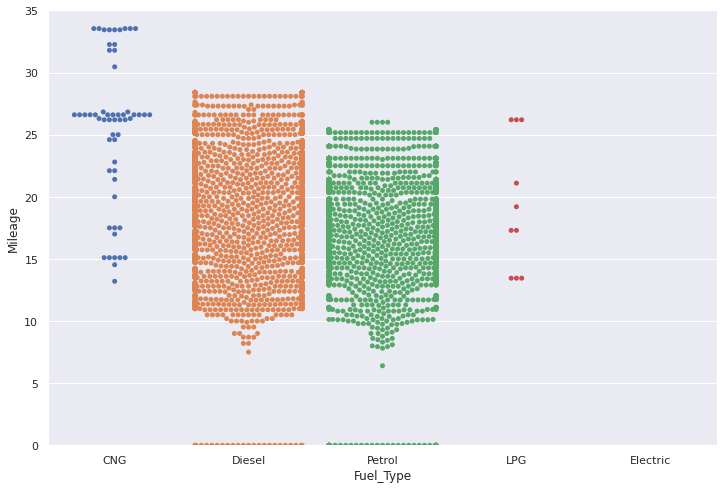

In [651]:
# Plot Korelasi Mileage dan Fuel Type

plt.figure(figsize=(20, 10))
mil_fuel = pd.concat([df['Mileage'], df['Fuel_Type']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.swarmplot(x='Fuel_Type', y='Mileage', data=mil_fuel)
fig.axis(ymin=0, ymax=35);

In [652]:
# Jumlah sampel masing-masing Fuel Type setelah reduksi data
mil_fuel['Fuel_Type'].value_counts()

Diesel      3042
Petrol      2707
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

## ----Analisis Tambahan----
**Variabel-variabel yg berpengaruh pada Harga Mobil secara Umum**

### Lokasi (Kota) - Harga

In [653]:
# Proses Reduksi Outlier Price

Q1_0 = df["Price"].quantile(0.25)
Q3_0 = df["Price"].quantile(0.75)
IQR_0 = Q3_0-Q1_0
print("Q1  : ", Q1_0)
print("Q3  : ", Q3_0)
print("IQR : ", IQR_0)
Lower_Whisker = Q1_0 - 1.5*IQR_0
Upper_Whisker = Q3_0 + 1.5*IQR_0
print(Lower_Whisker, Upper_Whisker)

Q1  :  3.5
Q3  :  10.0
IQR :  6.5
-6.25 19.75


In [654]:
# Proses Reduksi Outlier Price

df = df[df["Price"]< Upper_Whisker]
afterout = df.shape
selisih = b4out[0]-afterout[0]
print("Sebelum Reduksi  = ", b4out)
print("Setelah Reduksi  = ", afterout)
print("Reduksi Sejumlah = ", selisih, "Baris")

Sebelum Reduksi  =  (6019, 12)
Setelah Reduksi  =  (5103, 12)
Reduksi Sejumlah =  916 Baris


In [655]:
df.Location.value_counts()

Mumbai        696
Hyderabad     601
Kochi         548
Pune          545
Kolkata       507
Delhi         483
Coimbatore    477
Chennai       405
Jaipur        371
Bangalore     264
Ahmedabad     206
Name: Location, dtype: int64

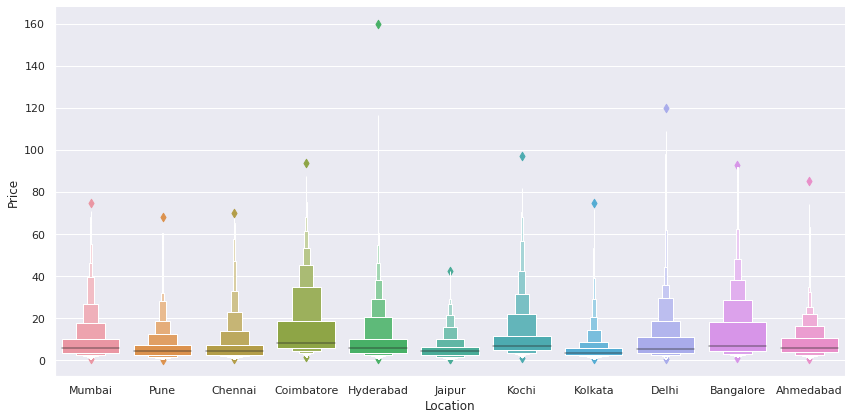

In [656]:
# Hubungan Kota dengan Harga Jual Mobil (Include Outlier)
try:
    sns.catplot(x='Location', y='Price', data=dataset,
                kind="boxen",height=6, aspect=2)
    
except ValueError:
    pass  # do nothing!

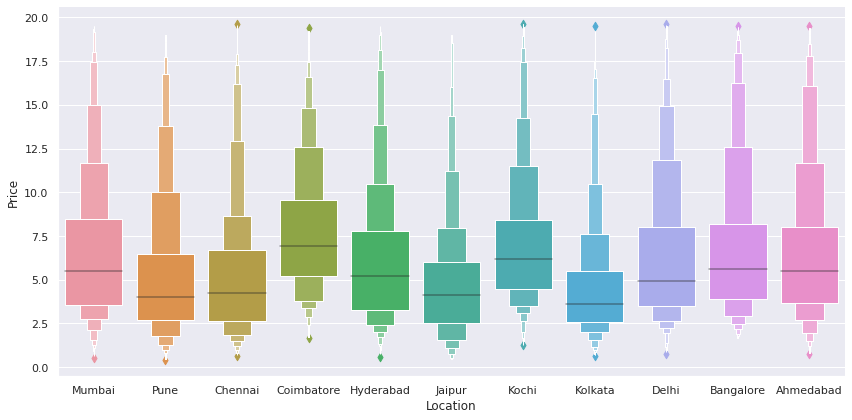

In [657]:
# Hubungan Kota dengan Harga Jual Mobil (Exclude Outlier)
try:
    sns.catplot(x='Location', y='Price', data=df,
                kind="boxen",height=6, aspect=2)
    
except ValueError:
    pass  # do nothing!

### Fuel Type - Harga

In [658]:
df.Fuel_Type.value_counts()

Petrol      2628
Diesel      2407
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

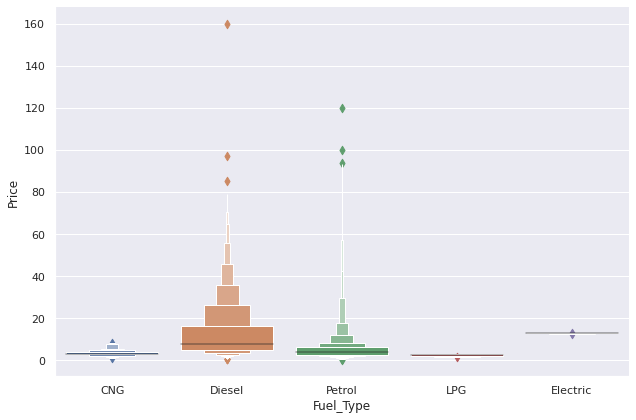

In [659]:
try:
    sns.catplot(x='Fuel_Type',y='Price',data=dataset,
                kind="boxen",height=6, aspect=1.5)
except ValueError:
    pass  # do nothing!

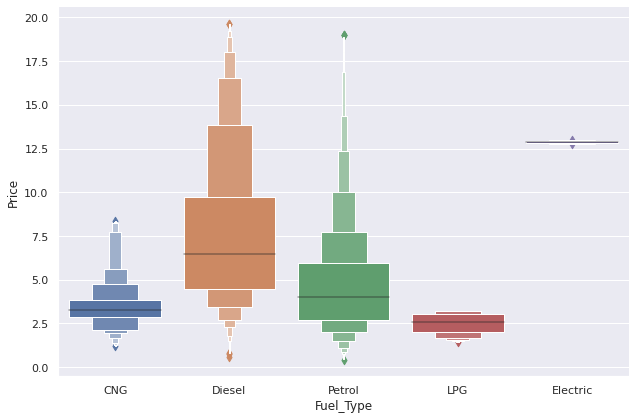

In [660]:
try:
    sns.catplot(x='Fuel_Type',y='Price',data=df,
                kind="boxen",height=6, aspect=1.5)
except ValueError:
    pass  # do nothing!

### Jenis Transmisi - Harga

In [661]:
df.Transmission.value_counts()

Manual       4085
Automatic    1018
Name: Transmission, dtype: int64

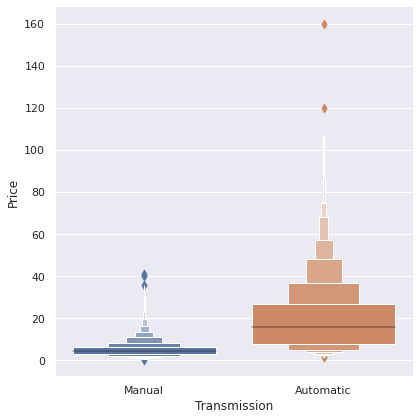

In [662]:
try:
    sns.catplot(x='Transmission',y='Price',data=dataset,
                kind="boxen",height=6, aspect=1)
except ValueError:
    pass  # do nothing!

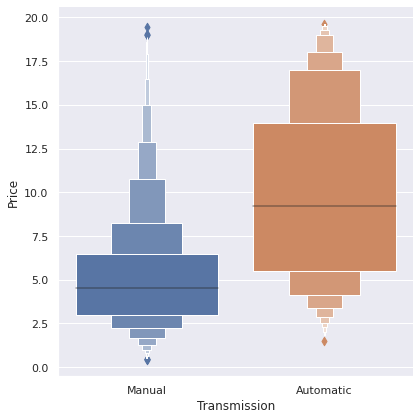

In [663]:
try:
    sns.catplot(x='Transmission',y='Price',data=df,
                kind="boxen",height=6, aspect=1)
except ValueError:
    pass  # do nothing!

### Brand - Harga

In [664]:
df.Name.value_counts()

Maruti           1187
Hyundai          1082
Honda             599
Volkswagen        309
Toyota            294
Ford              262
Mahindra          260
Tata              170
Skoda             161
Renault           141
Mercedes-Benz     127
BMW               120
Chevrolet         117
Nissan             88
Audi               82
Fiat               25
Mitsubishi         20
Datsun             13
Land               12
Jeep               11
Volvo              10
Force               3
ISUZU               2
Porsche             2
Jaguar              2
Mini                2
Smart               1
Ambassador          1
Name: Name, dtype: int64

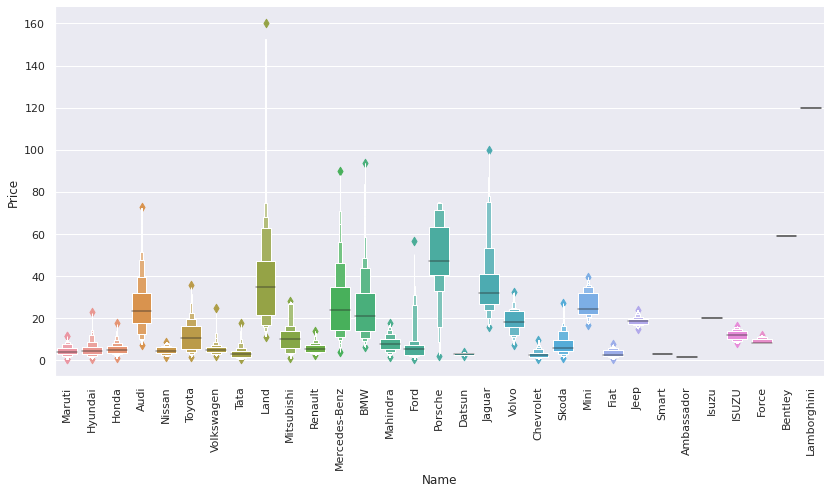

In [665]:
try:
    sns.catplot(x='Name',y='Price',data=dataset,
                kind="boxen",height=6, aspect=2)
    plt.xticks(rotation=90);
except ValueError:
    pass  # do nothing!

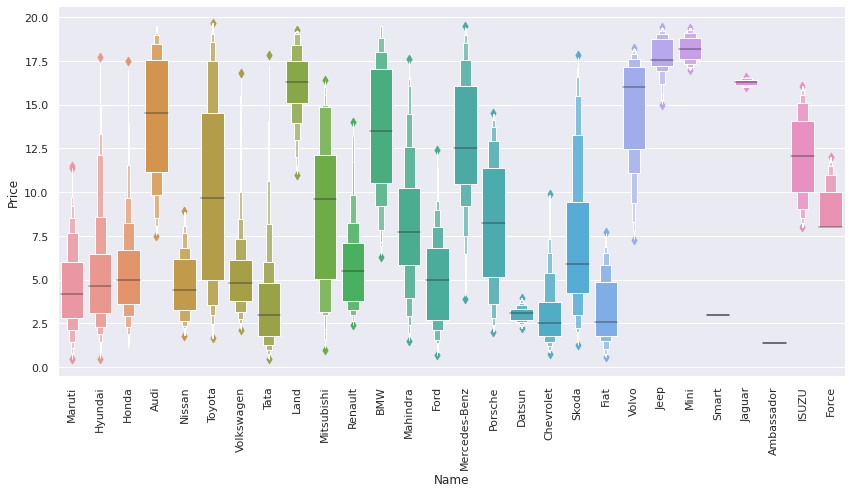

In [666]:
try:
    sns.catplot(x='Name',y='Price',data=df,
                kind="boxen",height=6, aspect=2)
    plt.xticks(rotation=90);
except ValueError:
    pass  # do nothing!

## **10. Faktor yg mempengaruhi harga mobil bekas**

In [667]:
#Re-Import Raw Data

data = dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [668]:
# Drop Row 'First'

data = data[data.Owner_Type != 'First']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 4 to 6016
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1090 non-null   object 
 1   Location           1090 non-null   object 
 2   Year               1090 non-null   int64  
 3   Kilometers_Driven  1090 non-null   int64  
 4   Fuel_Type          1090 non-null   object 
 5   Transmission       1090 non-null   object 
 6   Owner_Type         1090 non-null   object 
 7   Mileage            1090 non-null   object 
 8   Engine             1076 non-null   object 
 9   Power              1076 non-null   object 
 10  Seats              1072 non-null   float64
 11  Price              1090 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 110.7+ KB


In [669]:
print("Ukuran Data Asli: ", data.shape)
data = data[data['Mileage'].notna()]
print("Ukuran Data setelah hapus data kosong di Mileage: ",data.shape)
data = data[data['Engine'].notna()]
print("Ukuran Data setelah hapus data kosong di Engine : ",data.shape)
data = data[data['Power'].notna()]
print("Ukuran Data setelah hapus data kosong di Power  : ",data.shape)
data = data[data['Seats'].notna()]
print("Ukuran Data setelah hapus data kosong di Seats  : ",data.shape)

Ukuran Data Asli:  (1090, 12)
Ukuran Data setelah hapus data kosong di Mileage:  (1090, 12)
Ukuran Data setelah hapus data kosong di Engine :  (1076, 12)
Ukuran Data setelah hapus data kosong di Power  :  (1076, 12)
Ukuran Data setelah hapus data kosong di Seats  :  (1072, 12)


In [670]:
data = data.reset_index(drop=True)
print('Index reset done')

for i in range(data.shape[0]):
    data.at[i, 'Mileage'] = data['Mileage'][i].split()[0]
    data.at[i, 'Engine'] = data['Engine'][i].split()[0]
    data.at[i, 'Power'] = data['Power'][i].split()[0]
print('Split Done') 

data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)

position = []
for i in range(data.shape[0]):
    if data['Power'][i]=='null':
        position.append(i)
        
data = data.drop(data.index[position])
data = data.reset_index(drop=True) 

data['Power'] = data['Power'].astype(float)
data.head()

Index reset done
Split Done


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74
1,Tata,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.0,5.0,1.95
2,Land,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.0,5.0,17.50
3,Maruti,Bangalore,2015,55392,Diesel,Manual,Second,23.65,1248.0,88.5,5.0,8.25
4,Maruti,Hyderabad,2013,54000,Petrol,Manual,Second,20.92,998.0,67.1,5.0,2.75


In [671]:
# One Hot Encoding

Name = data[['Name']]
Name = pd.get_dummies(Name,drop_first=True)
Name.head()

Location = data[['Location']]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

Fuel_t = data[['Fuel_Type']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

Transmission = data[['Transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)

In [672]:
data= pd.concat([Name,data,Location,Fuel_t,Transmission],axis=1)
data.head()

data.drop(["Name","Location","Fuel_Type","Transmission"],axis=1,inplace=True)
data.head()

print("Final Size: ",data.shape)

Final Size:  (1033, 45)


In [673]:
data.head()

,Name_Audi,Name_BMW,Name_Chevrolet,Name_Fiat,Name_Ford,Name_Honda,Name_Hyundai,Name_Jaguar,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,40670,2,15.20,1968.0,140.8,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2012,65932,2,22.30,1248.0,74.0,5.0,1.95,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,85000,2,0.00,2179.0,115.0,5.0,17.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2015,55392,2,23.65,1248.0,88.5,5.0,8.25,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2013,54000,2,20.92,998.0,67.1,5.0,2.75,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [674]:
data.columns

Index(['Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Fiat', 'Name_Ford',
       'Name_Honda', 'Name_Hyundai', 'Name_Jaguar', 'Name_Lamborghini',
       'Name_Land', 'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz',
       'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan', 'Name_Porsche',
       'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Year', 'Kilometers_Driven',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [675]:
X = data.loc[:, ['Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Fiat', 'Name_Ford',
                'Name_Honda', 'Name_Hyundai', 'Name_Jaguar', 'Name_Lamborghini',
                'Name_Land', 'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz',
                'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan', 'Name_Porsche',
                'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
                'Name_Volkswagen', 'Name_Volvo', 'Year', 'Kilometers_Driven',
                'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
                'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
                'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
                'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
                'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
                'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(1033, 44)

In [676]:
y = data.loc[:,['Price']]
y.shape

(1033, 1)

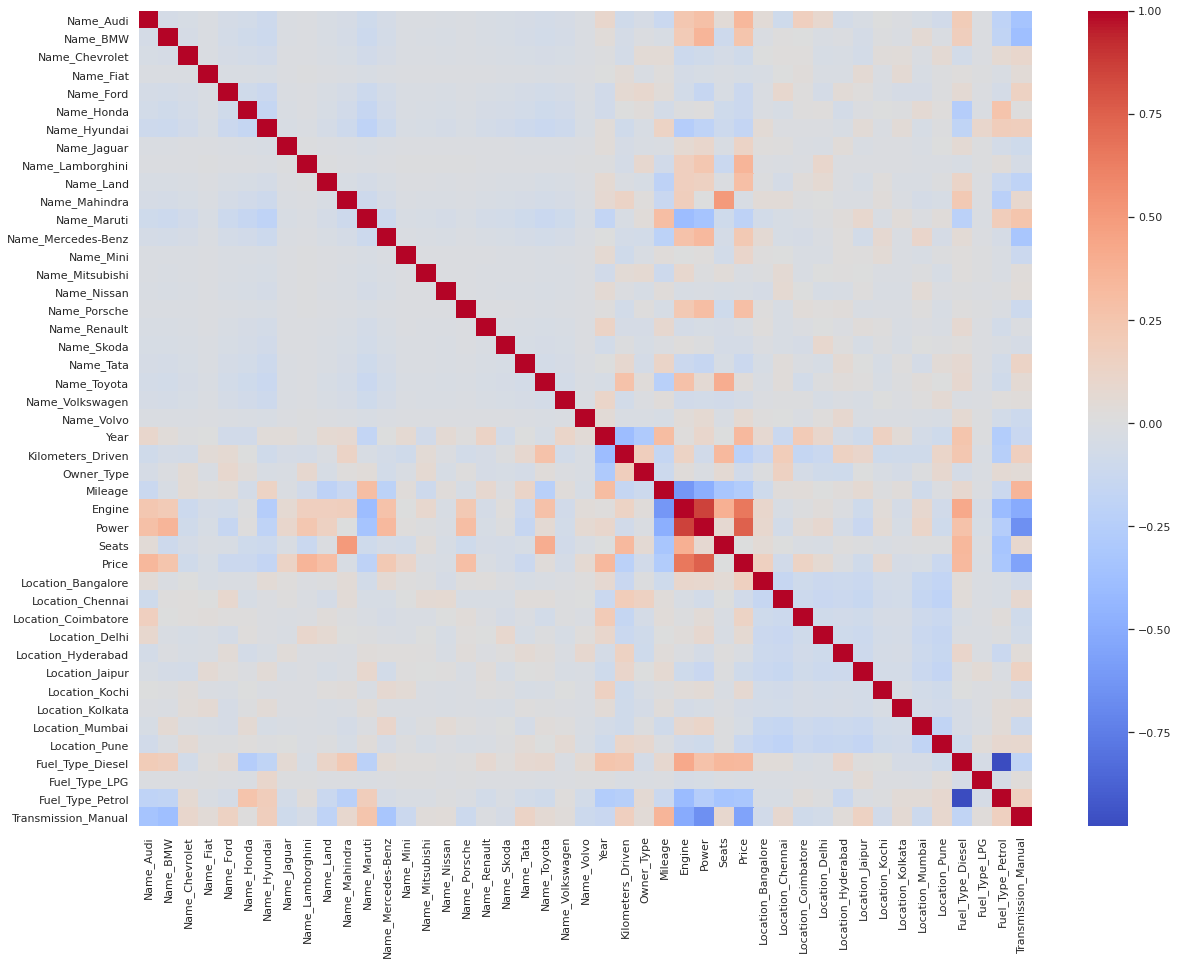

In [677]:
corrmat = data.corr()
top_corr_features = corrmat.index

#plot heat map
plt.figure(figsize=(20,15))
g=sns.heatmap(data[top_corr_features].corr(),annot=False,fmt = '.0g',
              cmap= 'coolwarm')

In [678]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [679]:
feat_importances.nlargest(20)

Transmission_Manual    0.243947
Power                  0.182421
Year                   0.116174
Engine                 0.114480
Fuel_Type_Petrol       0.066129
Seats                  0.063959
Kilometers_Driven      0.037673
Name_Lamborghini       0.026517
Fuel_Type_Diesel       0.019832
Name_Land              0.019336
Name_Porsche           0.018298
Location_Bangalore     0.012671
Name_Mercedes-Benz     0.011708
Mileage                0.007286
Name_Toyota            0.006676
Name_Audi              0.005268
Location_Delhi         0.005108
Name_Mini              0.004956
Name_BMW               0.004806
Location_Coimbatore    0.002808
dtype: float64

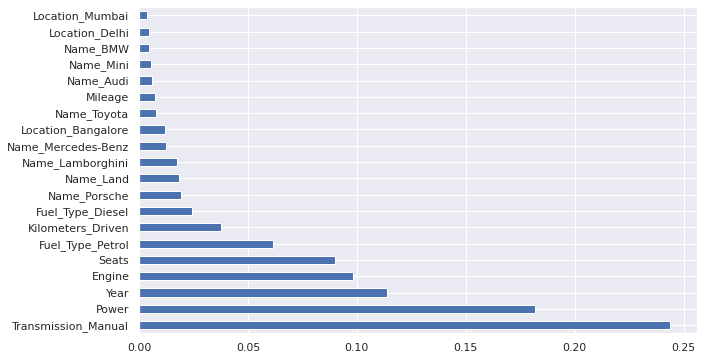

In [680]:
plt.figure(figsize = (10,6))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()